# Load the dataset

In [35]:
import pandas as pd

df = pd.read_csv("data/amazon_cells_labelled.txt", sep="\t", header=None, names=["Review", "Sentiment"])
df.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Preprocess the data

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Review"])
sequences = tokenizer.texts_to_sequences(df["Review"])

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)


In [38]:
X = padded_sequences
y = df["Sentiment"]

# Split the dataset into training and testing sets

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 30)
y_train shape: (800,)
X_test shape: (200, 30)
y_test shape: (200,)


# Create the model using GRU

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=16))
model.add(GRU(units=8))
model.add(Dense(units=1))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [41]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping callback

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Fit the model

In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping]).history

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5214 - loss: 2.9550 - val_accuracy: 0.5375 - val_loss: 1.2316
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5183 - loss: 1.1756 - val_accuracy: 0.5375 - val_loss: 1.0252
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5016 - loss: 1.0353 - val_accuracy: 0.5375 - val_loss: 0.9431
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5139 - loss: 0.9254 - val_accuracy: 0.5375 - val_loss: 0.8907
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5116 - loss: 0.8666 - val_accuracy: 0.5375 - val_loss: 0.8474
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5031 - loss: 0.8280 - val_accuracy: 0.5375 - val_loss: 0.8083
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4916 - loss: 0.7831 - val_accuracy: 0.5375 - val_loss: 0.7736
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5215 - loss: 0.7049 - val_accuracy: 0.5375 - 

# Evaluate the model

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6955 - loss: 0.7576
Test accuracy: 0.6900
Test loss: 0.7004


# Plot training and validation performance over epochs

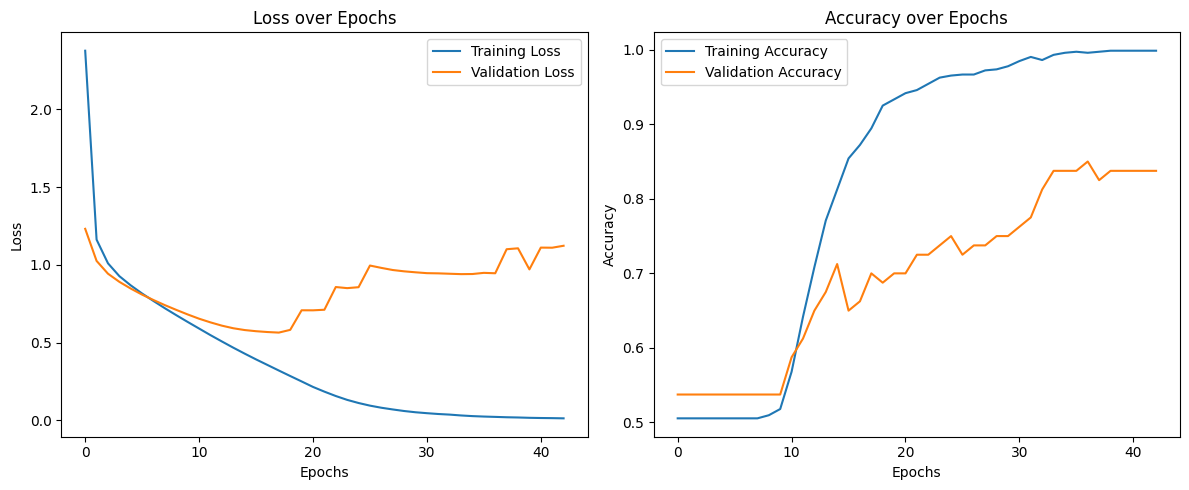

In [45]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history['loss'], label='Training Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.set_title('Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history['accuracy'], label='Training Accuracy')
ax2.plot(history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()